In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from glob import glob
import cv2
import fnmatch
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV

In [2]:
import numpy as np
import matplotlib.pylab as plt
#from scipy.misc import imresize, imread
import itertools
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
%matplotlib inline

In [3]:
imagePatches = glob('C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1251_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1301_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1351_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1501_class0.png
C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\10253\0\10253_idx5_x10

In [4]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:5],'\n')
print("IDC(+)\n\n",classOne[0:5])

IDC(-)

 ['C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1001_class0.png', 'C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1051_class0.png', 'C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1101_class0.png', 'C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1151_class0.png', 'C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1201_class0.png'] 

IDC(+)

 ['C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\1\\10253_idx5_x501_y351_class1.png', 'C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\1\\10253_idx5_x501_y401_class1.png', 'C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\1\\10253_idx5_x551_y301_class1.png', 'C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5\\10253\\1\\10253_idx5_x551_y351_class1.png', 'C:/Users/hp/D

In [5]:
def proc_images(lowerIndex,upperIndex):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """ 
    x = []
    y = []
    WIDTH = 50
    HEIGHT = 50
    for img in imagePatches[lowerIndex:upperIndex]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        if img in classZero:
            y.append(0)
        elif img in classOne:
            y.append(1)
        else:
            return
    return x,y

In [6]:
X,Y = proc_images(0,90000)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0] # (0 = no IDC, 1 = IDC)
imgs1 = X2[Y2==1] 

In [7]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X2,Y2)

Total number of images: 90000
Number of IDC(-) Images: 64583
Number of IDC(+) Images: 25417
Percentage of positive images: 28.24%
Image shape (Width, Height, Channels): (50, 50, 3)


In [8]:
dict_characters = {0: 'IDC(-)', 1: 'IDC(+)'}
print(df.head(10))
print("")
print(dict_characters)

                                              images  labels
0  [[[206, 164, 226], [196, 154, 224], [211, 175,...       0
1  [[[197, 150, 219], [201, 158, 217], [205, 173,...       0
2  [[[249, 245, 248], [248, 246, 248], [253, 246,...       0
3  [[[249, 247, 249], [249, 247, 249], [249, 247,...       0
4  [[[237, 231, 241], [245, 242, 246], [235, 222,...       0
5  [[[248, 246, 248], [248, 246, 248], [248, 246,...       0
6  [[[175, 120, 212], [145, 88, 175], [132, 72, 1...       0
7  [[[87, 38, 142], [120, 94, 165], [195, 180, 21...       0
8  [[[235, 228, 240], [242, 240, 246], [252, 244,...       0
9  [[[238, 223, 242], [239, 235, 241], [250, 245,...       0

{0: 'IDC(-)', 1: 'IDC(+)'}


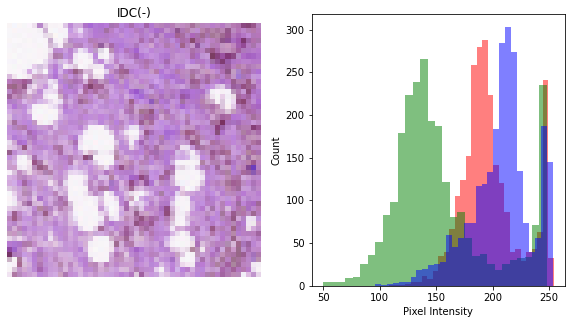

In [9]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC(+)' if Y[1] else 'IDC(-)')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X2[100])

In [10]:
X=np.array(X)

In [11]:
X=X/255.0

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
# Reduce Sample Size for DeBugging
X_train = X_train[0:300000] 
Y_train = Y_train[0:300000]

In [14]:
X_test = X_test[0:300000] 
Y_test = Y_test[0:300000]

In [15]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (72000, 50, 50, 3)
Testing Data Shape: (18000, 50, 50, 3)


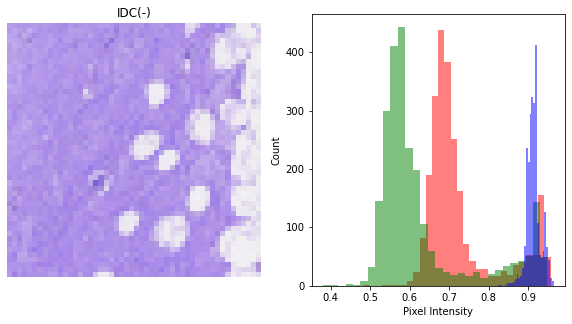

In [16]:
plotHistogram(X_train[100])

In [17]:
from keras.utils.np_utils import to_categorical

In [18]:
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainHot = to_categorical(Y_train, num_classes = 2)
Y_testHot = to_categorical(Y_test, num_classes = 2)

In [19]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [20]:
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{0: 'IDC(-)', 1: 'IDC(+)'}


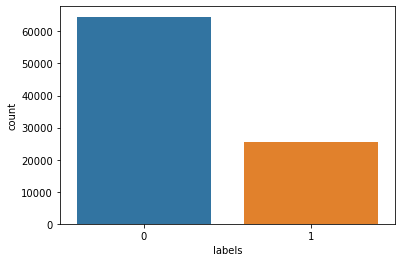

In [21]:
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{0: 'IDC(-)', 1: 'IDC(+)'}


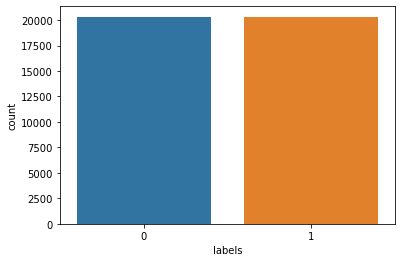

In [22]:
# Deal with imbalanced class sizes below
# Make Data 1D for compatability upsampling methods
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
#print("X_train Shape: ",X_train.shape)
#print("X_test Shape: ",X_test.shape)
#print("X_trainFlat Shape: ",X_trainFlat.shape)
#print("X_testFlat Shape: ",X_testFlat.shape)


#ros = RandomOverSampler(ratio='auto')
ros = RandomUnderSampler()
X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, Y_train)
X_testRos, Y_testRos = ros.fit_resample(X_testFlat, Y_test)

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
#print("X_train: ", X_train.shape)
#print("X_trainFlat: ", X_trainFlat.shape)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_testRos Shape: ",X_testRos.shape)
#print("Y_trainRosHot Shape: ",Y_trainRosHot.shape)
#print("Y_testRosHot Shape: ",Y_testRosHot.shape)

for i in range(len(X_trainRos)):
    height, width, channels = 50,50,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_trainRosReshaped Shape: ",X_trainRosReshaped.shape)

for i in range(len(X_testRos)):
    height, width, channels = 50,50,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)
#print("X_testRos Shape: ",X_testRos.shape)
#print("X_testRosReshaped Shape: ",X_testRosReshaped.shape)

dfRos = pd.DataFrame()
dfRos["labels"]=Y_trainRos
labRos = dfRos['labels']
distRos = lab.value_counts()
sns.countplot(labRos)
print(dict_characters)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection


In [24]:
#runLogisticRegression
def runLogisticRegression(a,b,c,d):
    """Run LogisticRegression w/ Kfold CV"""
    model = LogisticRegression()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    #print('LogisticRegression - Training set accuracy: ', mean)
    print('LogisticRegression - done')

In [25]:
modelLR = runLogisticRegression(X_trainRos, Y_trainRos, X_testRos, Y_testRos)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression - done


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#runKNN
def runKnn(a,b,c,d):
    model = KNeighborsClassifier()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    #print('KNeighbors - Training set accuracy: ', mean)
    print('KNeighbors - done')

In [28]:
modelKnn = runKnn(X_trainRos, Y_trainRos, X_testRos, Y_testRos)

KNeighbors - done


In [38]:
from sklearn.svm import SVC

In [39]:
#runSVM
def runSVM(a,b,c,d):
    model = SVC()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    #print('Support Vector Machine SVC - Training set accuracy: ', mean)
    print('Support Vector Machine SVC - done')

In [40]:
runSVM(X_trainRos, Y_trainRos, X_testRos, Y_testRos)

Support Vector Machine SVC - done


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
#runDT
def runDT(a,b,c,d):
    model = DecisionTreeClassifier()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    #print('Decision Trees - Training set accuracy: ', mean)
    print('Decision Trees - done')

In [31]:
modelDT = runDT(X_trainRos, Y_trainRos, X_testRos, Y_testRos)

Decision Trees - done


In [32]:
#runRF
def runRF(a,b,c,d):
    model = RandomForestClassifier()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    #print('RandomForest - Training set accuracy: ', mean)
    print('RandomForest - done')

In [33]:
modelRF = runRF(X_trainRos, Y_trainRos, X_testRos, Y_testRos)

RandomForest - done


In [34]:
from sklearn.neighbors import KNeighborsClassifier

estimators = {
    'LogisticRegressionClassifier':[LogisticRegression()],
    'KNeighborsClassifier': [KNeighborsClassifier()],
    'DecisionTreeClassifier':[DecisionTreeClassifier()],
    'RandomForestClassifier' :[RandomForestClassifier()],   
}

In [35]:
X_train_scaled = X_trainRos.copy()

def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_trainRos, Y_trainRos)
        print(m+' fitted')

mfit(estimators, X_train_scaled, Y_trainRos)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionClassifier fitted
KNeighborsClassifier fitted
DecisionTreeClassifier fitted
RandomForestClassifier fitted


In [36]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
X_test_scaled = X_testRos.copy()
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    r_a_score = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_testRos)
        r_a_score[m] = roc_auc_score(Y_testRos, y_pred)
        outcome[m] = [y_pred, confusion_matrix(y_pred,Y_testRos), classification_report(y_pred,Y_testRos)]
    return outcome, r_a_score

outcome, r_a_score = mpredict(estimators, X_test_scaled, Y_testRos)

In [37]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    print(outcome[m][1])
    print(outcome[m][2])

------------------------LogisticRegressionClassifier------------------------
[[3832 1639]
 [1256 3449]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      5471
           1       0.68      0.73      0.70      4705

    accuracy                           0.72     10176
   macro avg       0.72      0.72      0.72     10176
weighted avg       0.72      0.72      0.72     10176

------------------------KNeighborsClassifier------------------------
[[3480  884]
 [1608 4204]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      4364
           1       0.83      0.72      0.77      5812

    accuracy                           0.76     10176
   macro avg       0.76      0.76      0.75     10176
weighted avg       0.77      0.76      0.76     10176

------------------------DecisionTreeClassifier------------------------
[[3432 1531]
 [1656 3557]]
              precision    recall  f1-score   su

In [41]:
from sklearn.neighbors import KNeighborsClassifier

estimators = {
    'SupportVectorMachineSVC':[SVC()], 
}

In [42]:
X_train_scaled = X_trainRos.copy()

def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_trainRos, Y_trainRos)
        print(m+' fitted')

mfit(estimators, X_train_scaled, Y_trainRos)

SupportVectorMachineSVC fitted


In [43]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
X_test_scaled = X_testRos.copy()
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    r_a_score = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_testRos)
        r_a_score[m] = roc_auc_score(Y_testRos, y_pred)
        outcome[m] = [y_pred, confusion_matrix(y_pred,Y_testRos), classification_report(y_pred,Y_testRos)]
    return outcome, r_a_score

outcome, r_a_score = mpredict(estimators, X_test_scaled, Y_testRos)

In [44]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    print(outcome[m][1])
    print(outcome[m][2])

------------------------SupportVectorMachineSVC------------------------
[[4230 1015]
 [ 858 4073]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5245
           1       0.80      0.83      0.81      4931

    accuracy                           0.82     10176
   macro avg       0.82      0.82      0.82     10176
weighted avg       0.82      0.82      0.82     10176



In [2]:
voters = {
    'DT': sum([5,5,5,5]),
    'LR': sum([4,4,4,4]),
    'KNN' : sum([3,3,3,3]),
    'RF': sum([2,2,2,2]),
    'SVM': sum([1,1,1,1])
}
sort_voters= sorted(voters.items(), key=lambda item: item[1])
print("Le classement des modèles : ", sort_voters)

Le classement des modèles :  [('SVM', 4), ('RF', 8), ('KNN', 12), ('LR', 16), ('DT', 20)]
